## Prediction / Forecasting

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import xgboost as xgb


To develop a model for tenure to predict the factors that influencer whether a customer stays


In [ ]:
df = pd.read_csv('file.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [ ]:
df.describe()

,Unnamed: 0,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52955.000000,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52955.000000,52555.000000
mean,26477.000000,15346.70981,26.127995,32409.825675,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652800,19.953382
std,15286.936089,1766.55602,13.478285,8648.668977,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333664,8.127108
min,0.000000,12346.00000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,10.000000
25%,13238.500000,13869.00000,15.000000,25384.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,26477.000000,15311.00000,27.000000,32625.500000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,39715.500000,16996.25000,37.000000,39126.250000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,52954.000000,18283.00000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000


##### Data Cleaning

In [ ]:
df.isnull().sum()

Unnamed: 0               0
CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64

In [ ]:
df = df.dropna(subset='CustomerID')
df.isnull().sum()

Unnamed: 0               0
CustomerID               0
Gender                   0
Location                 0
Tenure_Months            0
Transaction_ID           0
Transaction_Date         0
Product_SKU              0
Product_Description      0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
GST                      0
Date                     0
Offline_Spend            0
Online_Spend             0
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64

In [ ]:
df[['Coupon_Code', 'Discount_pct']]

,Coupon_Code,Discount_pct
0,ELEC10,10.0
1,ELEC10,10.0
2,ELEC10,10.0
3,ELEC10,10.0
4,ELEC10,10.0
...,...,...
52919,GC30,30.0
52920,GC30,30.0
52921,NJ10,10.0
52922,NJ10,10.0


In [ ]:
df = df.drop(columns=['Unnamed: 0', 'Coupon_Code'], axis=1)
df['Discount_pct'] = df['Discount_pct'].fillna(0)
df.isnull().sum()

CustomerID             0
Gender                 0
Location               0
Tenure_Months          0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
GST                    0
Date                   0
Offline_Spend          0
Online_Spend           0
Month                  0
Discount_pct           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52924 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  float64
 1   Gender               52924 non-null  object 
 2   Location             52924 non-null  object 
 3   Tenure_Months        52924 non-null  float64
 4   Transaction_ID       52924 non-null  float64
 5   Transaction_Date     52924 non-null  object 
 6   Product_SKU          52924 non-null  object 
 7   Product_Description  52924 non-null  object 
 8   Product_Category     52924 non-null  object 
 9   Quantity             52924 non-null  float64
 10  Avg_Price            52924 non-null  float64
 11  Delivery_Charges     52924 non-null  float64
 12  Coupon_Status        52924 non-null  object 
 13  GST                  52924 non-null  float64
 14  Date                 52924 non-null  object 
 15  Offline_Spend        52924 non-null  floa

In [ ]:
df.describe()

,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000
mean,15346.70981,26.127995,32409.825675,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652388,19.802358
std,1766.55602,13.478285,8648.668977,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333364,8.278878
min,12346.00000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,0.000000
25%,13869.00000,15.000000,25384.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,15311.00000,27.000000,32625.500000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,16996.25000,37.000000,39126.250000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,18283.00000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000


In [ ]:
df.to_csv('df_cleaned.csv', index=False)

##### Data Preprocessing

In [ ]:
df = pd.read_csv('df_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  float64
 1   Gender               52924 non-null  object 
 2   Location             52924 non-null  object 
 3   Tenure_Months        52924 non-null  float64
 4   Transaction_ID       52924 non-null  float64
 5   Transaction_Date     52924 non-null  object 
 6   Product_SKU          52924 non-null  object 
 7   Product_Description  52924 non-null  object 
 8   Product_Category     52924 non-null  object 
 9   Quantity             52924 non-null  float64
 10  Avg_Price            52924 non-null  float64
 11  Delivery_Charges     52924 non-null  float64
 12  Coupon_Status        52924 non-null  object 
 13  GST                  52924 non-null  float64
 14  Date                 52924 non-null  object 
 15  Offline_Spend        52924 non-null 

In [ ]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Day_Since'] = (df['Transaction_Date'].max() - df['Transaction_Date']).dt.days


In [ ]:
df = df.drop(columns=['Transaction_Date'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  float64
 1   Gender               52924 non-null  object 
 2   Location             52924 non-null  object 
 3   Tenure_Months        52924 non-null  float64
 4   Transaction_ID       52924 non-null  float64
 5   Product_SKU          52924 non-null  object 
 6   Product_Description  52924 non-null  object 
 7   Product_Category     52924 non-null  object 
 8   Quantity             52924 non-null  float64
 9   Avg_Price            52924 non-null  float64
 10  Delivery_Charges     52924 non-null  float64
 11  Coupon_Status        52924 non-null  object 
 12  GST                  52924 non-null  float64
 13  Date                 52924 non-null  object 
 14  Offline_Spend        52924 non-null  float64
 15  Online_Spend         52924 non-null 

In [ ]:
df = df.drop(columns=['Date', 'Product_SKU', 'Product_Description', 'Transaction_ID', 'CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            52924 non-null  object 
 1   Location          52924 non-null  object 
 2   Tenure_Months     52924 non-null  float64
 3   Product_Category  52924 non-null  object 
 4   Quantity          52924 non-null  float64
 5   Avg_Price         52924 non-null  float64
 6   Delivery_Charges  52924 non-null  float64
 7   Coupon_Status     52924 non-null  object 
 8   GST               52924 non-null  float64
 9   Offline_Spend     52924 non-null  float64
 10  Online_Spend      52924 non-null  float64
 11  Month             52924 non-null  int64  
 12  Discount_pct      52924 non-null  float64
 13  Day_Since         52924 non-null  int64  
dtypes: float64(8), int64(2), object(4)
memory usage: 5.7+ MB


In [ ]:
import calendar

df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[int(x)])
df['Month'].unique()


array(['Jan', 'Dec', 'Aug', 'Mar', 'Jun', 'Sep', 'Nov', 'Feb', 'Apr',
       'May', 'Jul', 'Oct'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            52924 non-null  object 
 1   Location          52924 non-null  object 
 2   Tenure_Months     52924 non-null  float64
 3   Product_Category  52924 non-null  object 
 4   Quantity          52924 non-null  float64
 5   Avg_Price         52924 non-null  float64
 6   Delivery_Charges  52924 non-null  float64
 7   Coupon_Status     52924 non-null  object 
 8   GST               52924 non-null  float64
 9   Offline_Spend     52924 non-null  float64
 10  Online_Spend      52924 non-null  float64
 11  Month             52924 non-null  object 
 12  Discount_pct      52924 non-null  float64
 13  Day_Since         52924 non-null  int64  
dtypes: float64(8), int64(1), object(5)
memory usage: 5.7+ MB


In [ ]:
df.to_csv('df_processed.csv', index=False)

### Churn Prediction

In [2]:
transaction_df = pd.read_csv('df_cleaned.csv')
print(transaction_df.shape)
transaction_df.head()

(52924, 19)


,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,10.0


In [3]:
transaction_df['Transaction_Date'] = pd.to_datetime(transaction_df['Transaction_Date'])

In [4]:
transaction_3Q_df = transaction_df[transaction_df['Transaction_Date'].dt.quarter <= 3]
print(transaction_3Q_df.shape)
transaction_3Q_df.head()

(40297, 19)


,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,10.0


In [5]:
transaction_3Q_df['Coupon_Status'].unique()

array(['Used', 'Not Used', 'Clicked'], dtype=object)

In [6]:
coupon_counts = transaction_3Q_df.groupby('CustomerID')['Coupon_Status'].value_counts().unstack(fill_value=0)
coupon_counts['percentage_used'] = (coupon_counts['Used'] / coupon_counts.sum(axis=1)) * 100

In [7]:
coupon_counts['Total_Avg_Price'] = transaction_3Q_df.groupby(['CustomerID'])['Avg_Price'].transform('mean')
coupon_counts['Avg_Discount_Pct'] = transaction_3Q_df.groupby(['CustomerID'])['Discount_pct'].transform('mean')

In [8]:
coupon_counts.head()

Coupon_Status,Clicked,Not Used,Used,percentage_used,Total_Avg_Price,Avg_Discount_Pct
CustomerID,,,,,,
12346.0,0,0,2,100.000000,27.015000,20.0
12347.0,15,8,8,25.806452,27.015000,20.0
12348.0,8,1,8,47.058824,27.015000,20.0
12356.0,17,8,11,30.555556,15.157273,20.0
12359.0,9,5,2,12.500000,15.157273,20.0


In [9]:
coupon_counts.describe()

Coupon_Status,Clicked,Not Used,Used,percentage_used,Total_Avg_Price,Avg_Discount_Pct
count,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000
mean,16.972659,5.114333,11.299089,34.228562,42.622624,23.883025
std,23.136879,7.534235,16.152338,17.425857,15.312081,4.879833
min,0.000000,0.000000,0.000000,0.000000,4.280000,10.384615
25%,4.000000,1.000000,3.000000,26.315789,34.419333,20.000000
50%,10.000000,3.000000,7.000000,33.333333,41.277059,22.812500
75%,22.000000,7.000000,14.000000,40.523435,49.234054,29.482759
max,328.000000,115.000000,252.000000,100.000000,119.000000,30.000000


In [10]:
# Extract quarter and year from Transaction_Date
transaction_df['Quarter'] = transaction_df['Transaction_Date'].dt.to_period('Q')

# Group by customer_id and quarter, then sum up the amount for each group
quarterly_spending = transaction_df.groupby(['CustomerID', 'Quarter'])['Online_Spend'].sum().reset_index()

In [11]:
# Pivot the quarterly_spending DataFrame
quarterly_spending = quarterly_spending.pivot_table(index='CustomerID', columns='Quarter', values='Online_Spend', fill_value=0)

# Reset index to convert customer_id back into a column
quarterly_spending.reset_index(inplace=True)

# Rename the columns for clarity
quarterly_spending.columns = ['CustomerID', 'Prev3Q', 'Prev2Q', 'Prev1Q', 'Next_Quarter']

In [12]:
quarterly_spending.head()

,CustomerID,Prev3Q,Prev2Q,Prev1Q,Next_Quarter
0,12346.0,0.0,0.00,5093.34,0.00
1,12347.0,61504.0,0.00,0.00,65835.54
2,12348.0,0.0,37690.19,0.00,9787.14
3,12350.0,0.0,0.00,0.00,58383.27
4,12356.0,0.0,0.00,91680.12,0.00


In [13]:
q_spend_coupon_df = pd.merge(quarterly_spending, coupon_counts, on='CustomerID', how='left')
q_spend_coupon_df.head()

,CustomerID,Prev3Q,Prev2Q,Prev1Q,Next_Quarter,Clicked,Not Used,Used,percentage_used,Total_Avg_Price,Avg_Discount_Pct
0,12346.0,0.0,0.00,5093.34,0.00,0.0,0.0,2.0,100.000000,27.015000,20.0
1,12347.0,61504.0,0.00,0.00,65835.54,15.0,8.0,8.0,25.806452,27.015000,20.0
2,12348.0,0.0,37690.19,0.00,9787.14,8.0,1.0,8.0,47.058824,27.015000,20.0
3,12350.0,0.0,0.00,0.00,58383.27,NaN,NaN,NaN,NaN,NaN,NaN
4,12356.0,0.0,0.00,91680.12,0.00,17.0,8.0,11.0,30.555556,15.157273,20.0


In [14]:
q_spend_coupon_df.isna().sum()

CustomerID            0
Prev3Q                0
Prev2Q                0
Prev1Q                0
Next_Quarter          0
Clicked             261
Not Used            261
Used                261
percentage_used     261
Total_Avg_Price     261
Avg_Discount_Pct    261
dtype: int64

In [15]:
q_spend_coupon_df = q_spend_coupon_df.fillna(0)

In [16]:
q_spend_coupon_df.head()

,CustomerID,Prev3Q,Prev2Q,Prev1Q,Next_Quarter,Clicked,Not Used,Used,percentage_used,Total_Avg_Price,Avg_Discount_Pct
0,12346.0,0.0,0.00,5093.34,0.00,0.0,0.0,2.0,100.000000,27.015000,20.0
1,12347.0,61504.0,0.00,0.00,65835.54,15.0,8.0,8.0,25.806452,27.015000,20.0
2,12348.0,0.0,37690.19,0.00,9787.14,8.0,1.0,8.0,47.058824,27.015000,20.0
3,12350.0,0.0,0.00,0.00,58383.27,0.0,0.0,0.0,0.000000,0.000000,0.0
4,12356.0,0.0,0.00,91680.12,0.00,17.0,8.0,11.0,30.555556,15.157273,20.0


In [17]:
transaction_demographics_df = transaction_df[['CustomerID', 'Gender', 'Tenure_Months']]

In [18]:
merged_df = pd.merge(q_spend_coupon_df, transaction_demographics_df, on='CustomerID', how='left')
merged_df = merged_df.drop_duplicates()

In [19]:
gender_mapping = {'M': 0, 'F': 1}

# Map gender values to 0 and 1
merged_df['Gender'] = merged_df['Gender'].map(gender_mapping)

In [20]:
merged_df.head()

,CustomerID,Prev3Q,Prev2Q,Prev1Q,Next_Quarter,Clicked,Not Used,Used,percentage_used,Total_Avg_Price,Avg_Discount_Pct,Gender,Tenure_Months
0,12346.0,0.0,0.00,5093.34,0.00,0.0,0.0,2.0,100.000000,27.015000,20.0,1,31.0
2,12347.0,61504.0,0.00,0.00,65835.54,15.0,8.0,8.0,25.806452,27.015000,20.0,0,20.0
62,12348.0,0.0,37690.19,0.00,9787.14,8.0,1.0,8.0,47.058824,27.015000,20.0,0,39.0
85,12350.0,0.0,0.00,0.00,58383.27,0.0,0.0,0.0,0.000000,0.000000,0.0,0,25.0
102,12356.0,0.0,0.00,91680.12,0.00,17.0,8.0,11.0,30.555556,15.157273,20.0,1,31.0


In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1468 entries, 0 to 52822
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        1468 non-null   float64
 1   Prev3Q            1468 non-null   float64
 2   Prev2Q            1468 non-null   float64
 3   Prev1Q            1468 non-null   float64
 4   Next_Quarter      1468 non-null   float64
 5   Clicked           1468 non-null   float64
 6   Not Used          1468 non-null   float64
 7   Used              1468 non-null   float64
 8   percentage_used   1468 non-null   float64
 9   Total_Avg_Price   1468 non-null   float64
 10  Avg_Discount_Pct  1468 non-null   float64
 11  Gender            1468 non-null   int64  
 12  Tenure_Months     1468 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 160.6 KB


In [22]:
X = merged_df.drop(columns=['Next_Quarter', 'CustomerID'], axis=1)
y = merged_df[['Next_Quarter']]

In [23]:
X.head()

,Prev3Q,Prev2Q,Prev1Q,Clicked,Not Used,Used,percentage_used,Total_Avg_Price,Avg_Discount_Pct,Gender,Tenure_Months
0,0.0,0.00,5093.34,0.0,0.0,2.0,100.000000,27.015000,20.0,1,31.0
2,61504.0,0.00,0.00,15.0,8.0,8.0,25.806452,27.015000,20.0,0,20.0
62,0.0,37690.19,0.00,8.0,1.0,8.0,47.058824,27.015000,20.0,0,39.0
85,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0,25.0
102,0.0,0.00,91680.12,17.0,8.0,11.0,30.555556,15.157273,20.0,1,31.0


In [24]:
y['willChurn'] = y['Next_Quarter'] == 0
y = y.drop(columns=['Next_Quarter'], axis=1)


/var/folders/pj/3bkj7rdx41j_rvx83ys41kth0000gn/T/ipykernel_12325/3725170871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['willChurn'] = y['Next_Quarter'] == 0


In [25]:
y.head()

,willChurn
0,True
2,False
62,False
85,False
102,True


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# categorical_features = X_train.select_dtypes(include=['object']).columns
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        # ('cat', categorical_transformer, categorical_features)
    ])

In [32]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

pipeline.fit(X_train, y_train)

/Users/joesurf/Documents/NUS/BZA/Y3S2/BT4211/env/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Prev3Q', 'Prev2Q', 'Prev1Q', 'Clicked', 'Not Used', 'Used',
       'percentage_used', 'Total_Avg_Price', 'Avg_Discount_Pct', 'Gender',
       'Tenure_Months'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

In [33]:
rf_classifier = pipeline.named_steps['model']


# Get feature importances
importances = rf_classifier.feature_importances_

# Pair feature names with their importances
# Assuming you have feature names available in a list called feature_names
feature_names = X.columns.tolist()  # Replace with your actual feature names
feature_importance_dict = dict(zip(feature_names, importances))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print sorted feature importances
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

Total_Avg_Price: 0.3736383702295567
Avg_Discount_Pct: 0.11774208624397911
Prev1Q: 0.08443092972780626
Prev2Q: 0.07456952388405277
percentage_used: 0.07021569704470058
Tenure_Months: 0.06805010531488603
Clicked: 0.057792362737495814
Prev3Q: 0.05403045870224587
Used: 0.04853090046939838
Not Used: 0.03885804065135853
Gender: 0.0121415249945198


In [34]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score


model = LogisticRegression()

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

/Users/joesurf/Documents/NUS/BZA/Y3S2/BT4211/env/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8163265306122449

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.60      0.72       113
        True       0.79      0.95      0.86       181

    accuracy                           0.82       294
   macro avg       0.84      0.78      0.79       294
weighted avg       0.83      0.82      0.81       294


Confusion Matrix:
[[ 68  45]
 [  9 172]]


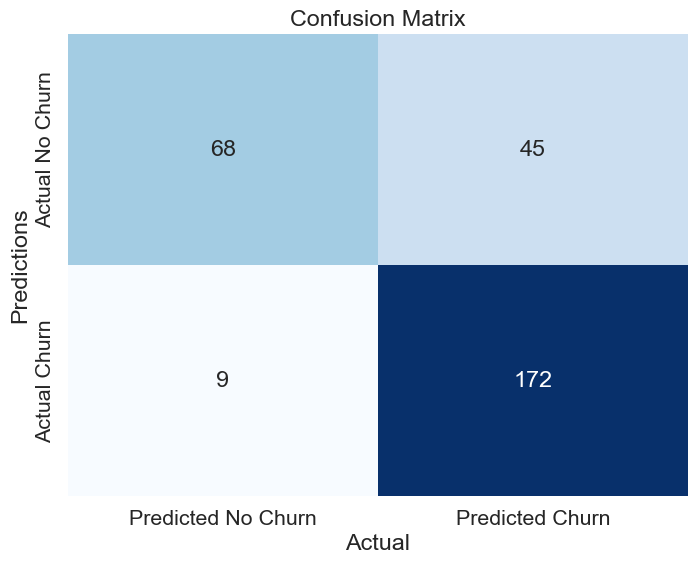

In [36]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Adjust to fit labels properly
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [37]:
model = pipeline.named_steps['model']

coefficients = model.coef_
intercept = model.intercept_

print(X_train.info())
print("Coefficients:", coefficients)
print("Intercept:", intercept)

<class 'pandas.core.frame.DataFrame'>
Index: 1174 entries, 23319 to 39592
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Prev3Q            1174 non-null   float64
 1   Prev2Q            1174 non-null   float64
 2   Prev1Q            1174 non-null   float64
 3   Clicked           1174 non-null   float64
 4   Not Used          1174 non-null   float64
 5   Used              1174 non-null   float64
 6   percentage_used   1174 non-null   float64
 7   Total_Avg_Price   1174 non-null   float64
 8   Avg_Discount_Pct  1174 non-null   float64
 9   Gender            1174 non-null   int64  
 10  Tenure_Months     1174 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 110.1 KB
None
Coefficients: [[-0.0281676  -0.04756983 -0.23368293 -0.08687123  0.24600399 -0.27701111
   0.24595125  0.54663568  0.98610294  0.05254584  0.00245435]]
Intercept: [0.56658719]


In [38]:
import pickle


with open('lr_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [126]:
import statsmodels.api as sm

X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Obtain the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.477687
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              willChurn   No. Observations:                 1468
Model:                          Logit   Df Residuals:                     1456
Method:                           MLE   Df Model:                           11
Date:                Tue, 16 Apr 2024   Pseudo R-squ.:                  0.2778
Time:                        00:22:03   Log-Likelihood:                -701.24
converged:                       True   LL-Null:                       -970.92
Covariance Type:            nonrobust   LLR p-value:                1.285e-108
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.5471      0.258     -9.877      0.000      -3.053      -2.042
Prev3Q     

### Segment Customers by Product Interest

In [3]:
transaction_df = pd.read_csv('df_cleaned.csv')
transaction_df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,10.0


In [7]:
segmented_customers = transaction_df.groupby('Product_Category')['CustomerID'].apply(list)
segmented_customers.head()

Product_Category
Accessories    [14606.0, 14606.0, 14606.0, 15719.0, 13800.0, ...
Android        [15923.0, 17581.0, 15525.0, 12947.0, 17364.0, ...
Apparel        [17850.0, 17850.0, 17850.0, 17850.0, 17850.0, ...
Backpacks      [17850.0, 14688.0, 14395.0, 17897.0, 12748.0, ...
Bags           [17850.0, 17850.0, 17850.0, 17850.0, 12583.0, ...
Name: CustomerID, dtype: object

In [10]:
customer_counts = segmented_customers.apply(lambda x: len(set(x)))
customer_counts

Product_Category
Accessories              150
Android                   42
Apparel                 1323
Backpacks                 75
Bags                     728
Bottles                  203
Drinkware                919
Fun                      118
Gift Cards                77
Google                    89
Headgear                 425
Housewares               107
Lifestyle                817
More Bags                 37
Nest                     516
Nest-Canada              205
Nest-USA                1260
Notebooks & Journals     383
Office                  1103
Waze                     309
Name: CustomerID, dtype: int64

In [164]:
unique_product_category_df = transaction_df.groupby('Product_Category')['Avg_Price'].mean().reset_index()
unique_product_category_df.head()


,Product_Category,Avg_Price
0,Accessories,8.211068
1,Android,15.903488
2,Apparel,19.788995
3,Backpacks,80.046404
4,Bags,29.830797


In [165]:
unique_product_category_df['Num_Customers'] = customer_counts.values
unique_product_category_df.head()

,Product_Category,Avg_Price,Num_Customers
0,Accessories,8.211068,150
1,Android,15.903488,42
2,Apparel,19.788995,1323
3,Backpacks,80.046404,75
4,Bags,29.830797,728


In [167]:
unique_product_category_df['Revenue'] = unique_product_category_df['Avg_Price'] * unique_product_category_df['Num_Customers']
unique_product_category_df

,Product_Category,Avg_Price,Num_Customers,Revenue
0,Accessories,8.211068,150,1231.660256
1,Android,15.903488,42,667.946512
2,Apparel,19.788995,1323,26180.840139
3,Backpacks,80.046404,75,6003.480337
4,Bags,29.830797,728,21716.820234
5,Bottles,3.437201,203,697.751903
6,Drinkware,10.696893,919,9830.445111
7,Fun,6.743812,118,795.769875
8,Gift Cards,111.363270,77,8574.971824
9,Google,16.446190,89,1463.710952


### Idea: Recommend similar products
Run cosine similarities across products customers have purchased together for recommendation to other customers through newsletter

In [136]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity


pivot_table = transaction_df.pivot_table(index='CustomerID', columns='Product_Description', aggfunc='size', fill_value=0)

cosine_sim_matrix = cosine_similarity(pivot_table)
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=pivot_table.index, columns=pivot_table.index)
cosine_sim_df.head()

CustomerID,12346.0,12347.0,12348.0,12350.0,12356.0,12359.0,12370.0,12373.0,12377.0,12383.0,...,18233.0,18239.0,18245.0,18250.0,18256.0,18259.0,18260.0,18269.0,18277.0,18283.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.000000,0.058926,0.113228,0.000000,0.000000,0.000000,0.040622,0.000000,0.000000,0.055385,...,0.0,0.062017,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
12347.0,0.058926,1.000000,0.146784,0.449013,0.233854,0.087941,0.406927,0.274986,0.396424,0.489538,...,0.0,0.504308,0.541676,0.097642,0.000000,0.000000,0.190500,0.0,0.500000,0.297223
12348.0,0.113228,0.146784,1.000000,0.057520,0.449359,0.000000,0.570346,0.113228,0.476089,0.112880,...,0.0,0.337060,0.111520,0.000000,0.080064,0.036736,0.142354,0.0,0.000000,0.426077
12350.0,0.000000,0.449013,0.057520,1.000000,0.120004,0.054153,0.268269,0.338667,0.226949,0.309491,...,0.0,0.283544,0.403050,0.093530,0.000000,0.000000,0.136859,0.0,0.359211,0.203363
12356.0,0.000000,0.233854,0.449359,0.120004,1.000000,0.282038,0.545058,0.031497,0.437038,0.303536,...,0.0,0.527408,0.268857,0.069589,0.000000,0.030657,0.118798,0.0,0.267261,0.416094


In [137]:
def recommend_product_for_customer(customer_id):
    similar_customers = cosine_sim_df[customer_id].sort_values(ascending=False).iloc[1:]
    similar_customer_ids = similar_customers.index[:2] 
    recommended_products = pivot_table.loc[similar_customer_ids].sum().sort_values(ascending=False)[:3]
    return recommended_products.index.tolist()

In [138]:
customer_id = 12346.0
recommend_product_for_customer(customer_id)


["Android Men's Engineer Short Sleeve Tee Charcoal",
 "Women's Weatherblock Shell Jacket Black",
 'Nest Cam Indoor Security Camera - USA']

In [139]:
unique_customers = transaction_df['CustomerID'].unique().tolist()
customer_df = pd.DataFrame({
    'CustomerID': unique_customers
})

In [140]:
customer_df['Recommendations'] = customer_df['CustomerID'].apply(recommend_product_for_customer)
customer_df.tail()

,CustomerID,Recommendations
1463,17644.0,"[Google Infant Short Sleeve Tee Red, Google Sunglasses, Nest Cam Indoor Security Camera - USA]"
1464,16387.0,"[Google 22 oz Water Bottle, Sport Bag, Nest Cam Indoor Security Camera - USA]"
1465,15797.0,"[Nest Cam IQ - USA, Google Men's 100% Cotton Short Sleeve Hero Tee Red, Google Large Standard Journal Navy]"
1466,16138.0,"[Google Sunglasses, 1 oz Hand Sanitizer, Google Women's Short Sleeve Hero Tee Sky Blue]"
1467,13481.0,"[Google Sunglasses, 1 oz Hand Sanitizer, Google Women's Short Sleeve Hero Tee Sky Blue]"


In [141]:
pd.set_option('display.max_colwidth', 200)

customer_df.tail(10)

,CustomerID,Recommendations
1458,12935.0,"[Google 22 oz Water Bottle, Google Laptop and Cell Phone Stickers, Nest Protect Smoke + CO White Wired Alarm-USA]"
1459,12609.0,"[Google Women's Short Sleeve Badge Tee Grey, Google Women's Tee Grey, Google Women's Short Sleeve Hero Tee Heather]"
1460,13068.0,"[YouTube Custom Decals, YouTube Leatherette Notebook Combo, 24 oz YouTube Sergeant Stripe Bottle]"
1461,16660.0,"[Google Sunglasses, 1 oz Hand Sanitizer, Google Women's Short Sleeve Hero Tee Sky Blue]"
1462,14248.0,"[Google Women's Performance Golf Polo Blue, Google Women's Short Sleeve Badge Tee Grey, 1 oz Hand Sanitizer]"
1463,17644.0,"[Google Infant Short Sleeve Tee Red, Google Sunglasses, Nest Cam Indoor Security Camera - USA]"
1464,16387.0,"[Google 22 oz Water Bottle, Sport Bag, Nest Cam Indoor Security Camera - USA]"
1465,15797.0,"[Nest Cam IQ - USA, Google Men's 100% Cotton Short Sleeve Hero Tee Red, Google Large Standard Journal Navy]"
1466,16138.0,"[Google Sunglasses, 1 oz Hand Sanitizer, Google Women's Short Sleeve Hero Tee Sky Blue]"
1467,13481.0,"[Google Sunglasses, 1 oz Hand Sanitizer, Google Women's Short Sleeve Hero Tee Sky Blue]"


#### Generate price table for existing products

In [131]:
transaction_df = pd.read_csv('df_cleaned.csv')
transaction_df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,10.0


In [133]:
transaction_df[transaction_df['Product_Description'] == "Nest Learning Thermostat 3rd Gen-USA - Stainless Steel"]

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1.0,153.71,6.50,Used,0.1,1/1/2019,4500.0,2424.50,1,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1.0,153.71,6.50,Used,0.1,1/1/2019,4500.0,2424.50,1,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1.0,153.71,6.50,Clicked,0.1,1/1/2019,4500.0,2424.50,1,10.0
5,17850.0,M,Chicago,12.0,16701.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1.0,153.71,6.50,Clicked,0.1,1/1/2019,4500.0,2424.50,1,10.0
6,17850.0,M,Chicago,12.0,16702.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,2.0,153.71,6.50,Clicked,0.1,1/1/2019,4500.0,2424.50,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49008,16222.0,F,New York,45.0,41648.0,2019-10-25,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,2.0,149.00,12.99,Used,0.1,10/25/2019,3500.0,1416.14,10,10.0
49012,16222.0,F,New York,45.0,41655.0,2019-10-25,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1.0,149.00,12.99,Clicked,0.1,10/25/2019,3500.0,1416.14,10,10.0
49018,16222.0,F,New York,45.0,41684.0,2019-10-25,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,2.0,149.00,6.00,Used,0.1,10/25/2019,3500.0,1416.14,10,10.0
49020,16222.0,F,New York,45.0,41686.0,2019-10-25,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1.0,149.00,6.00,Used,0.1,10/25/2019,3500.0,1416.14,10,10.0


In [135]:
unique_products_df = transaction_df.groupby('Product_Description')['Avg_Price'].mean().reset_index()
unique_products_df.head()

,Product_Description,Avg_Price
0,1 oz Hand Sanitizer,1.873566
1,20 oz Stainless Steel Insulated Tumbler,22.348053
2,22 oz Android Bottle,2.787122
3,22 oz YouTube Bottle Infuser,4.137674
4,23 oz Wide Mouth Sport Bottle,9.478353


#### Calculate additional revenue assuming customer buys recommended products

In [149]:
def calculate_revenue_recommendations(recommended_list):
    return round(sum([unique_products_df.loc[unique_products_df['Product_Description'] == item, 'Avg_Price'].values[0] for item in recommended_list]), 2)


In [150]:
recommended_list = ["Google 22 oz Water Bottle", "Google Laptop and Cell Phone Stickers", "Nest Protect Smoke + CO White Wired Alarm-USA"]
calculate_revenue_recommendations(recommended_list)


84.94

In [151]:
customer_df.head()

,CustomerID,Recommendations
0,17850.0,"[Nest Learning Thermostat 3rd Gen-USA - Stainless Steel, Nest Cam Outdoor Security Camera - USA, Nest Cam Indoor Security Camera - USA]"
1,13047.0,"[Nest Learning Thermostat 3rd Gen-USA - Stainless Steel, Nest Cam Indoor Security Camera - USA, Nest Cam Outdoor Security Camera - USA]"
2,12583.0,"[Nest Learning Thermostat 3rd Gen-USA - Stainless Steel, Nest Cam Indoor Security Camera - USA, Nest Cam Outdoor Security Camera - USA]"
3,15100.0,"[Nest Cam Outdoor Security Camera - USA, Nest Learning Thermostat 3rd Gen-USA - Stainless Steel, Ballpoint LED Light Pen]"
4,14688.0,"[Nest Learning Thermostat 3rd Gen-USA - Stainless Steel, Nest Cam Indoor Security Camera - USA, Nest Protect Smoke + CO White Battery Alarm-USA]"


In [152]:
customer_df['Revenue'] = customer_df['Recommendations'].apply(calculate_revenue_recommendations)
customer_df.head()

,CustomerID,Recommendations,Revenue
0,17850.0,"[Nest Learning Thermostat 3rd Gen-USA - Stainless Steel, Nest Cam Outdoor Security Camera - USA, Nest Cam Indoor Security Camera - USA]",393.00
1,13047.0,"[Nest Learning Thermostat 3rd Gen-USA - Stainless Steel, Nest Cam Indoor Security Camera - USA, Nest Cam Outdoor Security Camera - USA]",393.00
2,12583.0,"[Nest Learning Thermostat 3rd Gen-USA - Stainless Steel, Nest Cam Indoor Security Camera - USA, Nest Cam Outdoor Security Camera - USA]",393.00
3,15100.0,"[Nest Cam Outdoor Security Camera - USA, Nest Learning Thermostat 3rd Gen-USA - Stainless Steel, Ballpoint LED Light Pen]",275.05
4,14688.0,"[Nest Learning Thermostat 3rd Gen-USA - Stainless Steel, Nest Cam Indoor Security Camera - USA, Nest Protect Smoke + CO White Battery Alarm-USA]",351.04


In [154]:
customer_df['Recommendations'] = customer_df['Recommendations'].apply(lambda x: ', '.join(x))

In [155]:
pd.set_option('display.max_colwidth', 200)

customer_df.tail(10)

,CustomerID,Recommendations,Revenue
1458,12935.0,"Google 22 oz Water Bottle, Google Laptop and Cell Phone Stickers, Nest Protect Smoke + CO White Wired Alarm-USA",84.94
1459,12609.0,"Google Women's Short Sleeve Badge Tee Grey, Google Women's Tee Grey, Google Women's Short Sleeve Hero Tee Heather",29.69
1460,13068.0,"YouTube Custom Decals, YouTube Leatherette Notebook Combo, 24 oz YouTube Sergeant Stripe Bottle",15.05
1461,16660.0,"Google Sunglasses, 1 oz Hand Sanitizer, Google Women's Short Sleeve Hero Tee Sky Blue",20.95
1462,14248.0,"Google Women's Performance Golf Polo Blue, Google Women's Short Sleeve Badge Tee Grey, 1 oz Hand Sanitizer",20.74
1463,17644.0,"Google Infant Short Sleeve Tee Red, Google Sunglasses, Nest Cam Indoor Security Camera - USA",136.55
1464,16387.0,"Google 22 oz Water Bottle, Sport Bag, Nest Cam Indoor Security Camera - USA",127.34
1465,15797.0,"Nest Cam IQ - USA, Google Men's 100% Cotton Short Sleeve Hero Tee Red, Google Large Standard Journal Navy",228.93
1466,16138.0,"Google Sunglasses, 1 oz Hand Sanitizer, Google Women's Short Sleeve Hero Tee Sky Blue",20.95
1467,13481.0,"Google Sunglasses, 1 oz Hand Sanitizer, Google Women's Short Sleeve Hero Tee Sky Blue",20.95


In [156]:
total_q4_revnue_from_recommendations = sum(customer_df['Revenue'])
total_q4_revnue_from_recommendations

400017.61

### Segmentation Further Analysis

In [49]:
segmented_customers = pd.read_csv('customer_segmented.csv')
segmented_customers.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Quarter,Revenue,Segment
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0,2019Q1,153.71,Inactive
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0,2019Q1,153.71,Inactive
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,...,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0,2019Q1,245.54,Inactive
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,...,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0,2019Q1,81.50,Inactive
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0,2019Q1,153.71,Inactive


In [50]:
segmented_customers.shape

(52524, 23)

In [53]:
# unique_segmented_customers = segmented_customers.drop_duplicates(subset=['CustomerID'])[['CustomerID', 'Segment']]
# unique_segmented_customers.head()

segmented_customers['Segment'].unique()


array(['Inactive', 'Active_Low_Value', 'Cold', 'Warm_Low_Value',
       'Active_High_Value', 'Warm_High_Value', 'New Active'], dtype=object)

In [82]:
transaction_df = segmented_customers[(segmented_customers['Segment'] == 'Active_High_Value') | (segmented_customers['Segment'] == 'Warm_High_Value')]

In [83]:
print(transaction_df.shape)
transaction_df.head()

(25618, 23)


,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Quarter,Revenue,Segment
29,14688.0,F,New York,46.0,16732.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,0.1,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,2019Q1,153.71,Active_High_Value
30,14688.0,F,New York,46.0,16733.0,2019-01-01,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1.0,...,0.1,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,2019Q1,122.77,Active_High_Value
31,14688.0,F,New York,46.0,16736.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,0.1,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,2019Q1,153.71,Active_High_Value
38,12431.0,F,New Jersey,14.0,16819.0,2019-01-03,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,0.1,1/3/2019,4500.0,1576.38,1,ELEC10,10.0,2019Q1,153.71,Active_High_Value
39,12431.0,F,New Jersey,14.0,16819.0,2019-01-03,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,1.0,...,0.1,1/3/2019,4500.0,1576.38,1,ELEC10,10.0,2019Q1,81.50,Active_High_Value


In [84]:
transaction_df['Transaction_Date'] = pd.to_datetime(transaction_df['Transaction_Date'])

/var/folders/pj/3bkj7rdx41j_rvx83ys41kth0000gn/T/ipykernel_12325/3861445833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_df['Transaction_Date'] = pd.to_datetime(transaction_df['Transaction_Date'])


In [85]:
transaction_3Q_df = transaction_df[transaction_df['Transaction_Date'].dt.quarter <= 3]
print(transaction_3Q_df.shape)
transaction_3Q_df.head()

(18297, 23)


,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Quarter,Revenue,Segment
29,14688.0,F,New York,46.0,16732.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,0.1,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,2019Q1,153.71,Active_High_Value
30,14688.0,F,New York,46.0,16733.0,2019-01-01,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1.0,...,0.1,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,2019Q1,122.77,Active_High_Value
31,14688.0,F,New York,46.0,16736.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,0.1,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,2019Q1,153.71,Active_High_Value
38,12431.0,F,New Jersey,14.0,16819.0,2019-01-03,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,0.1,1/3/2019,4500.0,1576.38,1,ELEC10,10.0,2019Q1,153.71,Active_High_Value
39,12431.0,F,New Jersey,14.0,16819.0,2019-01-03,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,1.0,...,0.1,1/3/2019,4500.0,1576.38,1,ELEC10,10.0,2019Q1,81.50,Active_High_Value


In [86]:
transaction_3Q_df['Coupon_Status'].unique()

array(['Clicked', 'Used', 'Not Used'], dtype=object)

In [87]:
coupon_counts = transaction_3Q_df.groupby('CustomerID')['Coupon_Status'].value_counts().unstack(fill_value=0)
coupon_counts['percentage_used'] = (coupon_counts['Used'] / coupon_counts.sum(axis=1)) * 100

In [88]:
coupon_counts['Total_Avg_Price'] = transaction_3Q_df.groupby(['CustomerID'])['Avg_Price'].transform('mean')
coupon_counts['Avg_Discount_Pct'] = transaction_3Q_df.groupby(['CustomerID'])['Discount_pct'].transform('mean')

In [89]:
coupon_counts.head()

Coupon_Status,Clicked,Not Used,Used,percentage_used,Total_Avg_Price,Avg_Discount_Pct
CustomerID,,,,,,
12347.0,14,8,8,26.666667,26.917692,20.000000
12377.0,24,6,13,30.232558,34.035946,18.783784
12383.0,38,9,21,30.882353,34.035946,18.783784
12393.0,11,2,9,40.909091,34.035946,18.783784
12413.0,13,1,12,46.153846,35.535897,23.846154


In [90]:
coupon_counts.describe()

Coupon_Status,Clicked,Not Used,Used,percentage_used,Total_Avg_Price,Avg_Discount_Pct
count,275.000000,275.000000,275.000000,275.000000,115.000000,115.000000
mean,33.538182,10.316364,22.680000,34.217723,42.553100,22.779920
std,35.685996,11.961232,25.728356,9.312011,11.881319,4.606712
min,0.000000,0.000000,0.000000,0.000000,15.055600,13.200000
25%,14.000000,4.000000,9.000000,29.679680,35.163020,19.985337
50%,25.000000,7.000000,16.000000,33.333333,41.243953,20.894309
75%,41.000000,12.000000,27.000000,38.461538,48.943077,26.666667
max,321.000000,113.000000,248.000000,100.000000,84.472333,30.000000


In [91]:
# Extract quarter and year from Transaction_Date
transaction_df['Quarter'] = transaction_df['Transaction_Date'].dt.to_period('Q')

# Group by customer_id and quarter, then sum up the amount for each group
quarterly_spending = transaction_df.groupby(['CustomerID', 'Quarter'])['Online_Spend'].sum().reset_index()

/var/folders/pj/3bkj7rdx41j_rvx83ys41kth0000gn/T/ipykernel_12325/1411967525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_df['Quarter'] = transaction_df['Transaction_Date'].dt.to_period('Q')


In [92]:
# Pivot the quarterly_spending DataFrame
quarterly_spending = quarterly_spending.pivot_table(index='CustomerID', columns='Quarter', values='Online_Spend', fill_value=0)

# Reset index to convert customer_id back into a column
quarterly_spending.reset_index(inplace=True)

# Rename the columns for clarity
quarterly_spending.columns = ['CustomerID', 'Prev4Q', 'Prev3Q', 'Prev2Q', 'Prev1Q']

In [93]:
quarterly_spending = quarterly_spending.drop(columns=['Prev4Q'], axis=1)

In [94]:
quarterly_spending.head()

,CustomerID,Prev3Q,Prev2Q,Prev1Q
0,12347.0,0.0,0.00,65835.54
1,12377.0,0.0,90434.59,16001.70
2,12383.0,0.0,151564.22,0.00
3,12393.0,0.0,67585.65,0.00
4,12413.0,0.0,25804.96,0.00


In [95]:
q_spend_coupon_df = pd.merge(quarterly_spending, coupon_counts, on='CustomerID', how='left')
q_spend_coupon_df.head()

,CustomerID,Prev3Q,Prev2Q,Prev1Q,Clicked,Not Used,Used,percentage_used,Total_Avg_Price,Avg_Discount_Pct
0,12347.0,0.0,0.00,65835.54,14.0,8.0,8.0,26.666667,26.917692,20.000000
1,12377.0,0.0,90434.59,16001.70,24.0,6.0,13.0,30.232558,34.035946,18.783784
2,12383.0,0.0,151564.22,0.00,38.0,9.0,21.0,30.882353,34.035946,18.783784
3,12393.0,0.0,67585.65,0.00,11.0,2.0,9.0,40.909091,34.035946,18.783784
4,12413.0,0.0,25804.96,0.00,13.0,1.0,12.0,46.153846,35.535897,23.846154


In [96]:
q_spend_coupon_df.isna().sum()

CustomerID            0
Prev3Q                0
Prev2Q                0
Prev1Q                0
Clicked              37
Not Used             37
Used                 37
percentage_used      37
Total_Avg_Price     197
Avg_Discount_Pct    197
dtype: int64

In [97]:
q_spend_coupon_df = q_spend_coupon_df.fillna(0)

In [98]:
q_spend_coupon_df.head()

,CustomerID,Prev3Q,Prev2Q,Prev1Q,Clicked,Not Used,Used,percentage_used,Total_Avg_Price,Avg_Discount_Pct
0,12347.0,0.0,0.00,65835.54,14.0,8.0,8.0,26.666667,26.917692,20.000000
1,12377.0,0.0,90434.59,16001.70,24.0,6.0,13.0,30.232558,34.035946,18.783784
2,12383.0,0.0,151564.22,0.00,38.0,9.0,21.0,30.882353,34.035946,18.783784
3,12393.0,0.0,67585.65,0.00,11.0,2.0,9.0,40.909091,34.035946,18.783784
4,12413.0,0.0,25804.96,0.00,13.0,1.0,12.0,46.153846,35.535897,23.846154


In [99]:
transaction_demographics_df = transaction_df[['CustomerID', 'Gender', 'Tenure_Months']]

In [100]:
merged_df = pd.merge(q_spend_coupon_df, transaction_demographics_df, on='CustomerID', how='left')
merged_df = merged_df.drop_duplicates()

In [101]:
gender_mapping = {'M': 0, 'F': 1}

# Map gender values to 0 and 1
merged_df['Gender'] = merged_df['Gender'].map(gender_mapping)

In [102]:
merged_df.head()

,CustomerID,Prev3Q,Prev2Q,Prev1Q,Clicked,Not Used,Used,percentage_used,Total_Avg_Price,Avg_Discount_Pct,Gender,Tenure_Months
0,12347.0,0.0,0.00,65835.54,14.0,8.0,8.0,26.666667,26.917692,20.000000,0,20.0
59,12377.0,0.0,90434.59,16001.70,24.0,6.0,13.0,30.232558,34.035946,18.783784,1,27.0
135,12383.0,0.0,151564.22,0.00,38.0,9.0,21.0,30.882353,34.035946,18.783784,0,32.0
203,12393.0,0.0,67585.65,0.00,11.0,2.0,9.0,40.909091,34.035946,18.783784,1,39.0
225,12413.0,0.0,25804.96,0.00,13.0,1.0,12.0,46.153846,35.535897,23.846154,1,15.0


In [103]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 0 to 25517
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        312 non-null    float64
 1   Prev3Q            312 non-null    float64
 2   Prev2Q            312 non-null    float64
 3   Prev1Q            312 non-null    float64
 4   Clicked           312 non-null    float64
 5   Not Used          312 non-null    float64
 6   Used              312 non-null    float64
 7   percentage_used   312 non-null    float64
 8   Total_Avg_Price   312 non-null    float64
 9   Avg_Discount_Pct  312 non-null    float64
 10  Gender            312 non-null    int64  
 11  Tenure_Months     312 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 31.7 KB


In [105]:
X = merged_df.drop(columns=['CustomerID'], axis=1)

In [106]:
X.head()

,Prev3Q,Prev2Q,Prev1Q,Clicked,Not Used,Used,percentage_used,Total_Avg_Price,Avg_Discount_Pct,Gender,Tenure_Months
0,0.0,0.00,65835.54,14.0,8.0,8.0,26.666667,26.917692,20.000000,0,20.0
59,0.0,90434.59,16001.70,24.0,6.0,13.0,30.232558,34.035946,18.783784,1,27.0
135,0.0,151564.22,0.00,38.0,9.0,21.0,30.882353,34.035946,18.783784,0,32.0
203,0.0,67585.65,0.00,11.0,2.0,9.0,40.909091,34.035946,18.783784,1,39.0
225,0.0,25804.96,0.00,13.0,1.0,12.0,46.153846,35.535897,23.846154,1,15.0


In [107]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Make predictions
y_pred = pipeline.predict(X)

In [108]:
y = merged_df[['CustomerID']]
y['willChurn'] = y_pred

/var/folders/pj/3bkj7rdx41j_rvx83ys41kth0000gn/T/ipykernel_12325/2784407346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['willChurn'] = y_pred


In [109]:
y.head()

,CustomerID,willChurn
0,12347.0,True
59,12377.0,True
135,12383.0,True
203,12393.0,True
225,12413.0,True


In [110]:
y['willChurn'].value_counts()

willChurn
False    211
True     101
Name: count, dtype: int64

In [113]:
y[y['willChurn'] == False]['CustomerID'].tolist()

[12451.0,
 12471.0,
 12472.0,
 12474.0,
 12501.0,
 12539.0,
 12540.0,
 12567.0,
 12578.0,
 12591.0,
 12626.0,
 12668.0,
 12681.0,
 12682.0,
 12683.0,
 12708.0,
 12731.0,
 12744.0,
 12748.0,
 12826.0,
 12854.0,
 12872.0,
 12916.0,
 12947.0,
 12971.0,
 13004.0,
 13048.0,
 13050.0,
 13069.0,
 13089.0,
 13093.0,
 13098.0,
 13102.0,
 13107.0,
 13148.0,
 13155.0,
 13158.0,
 13162.0,
 13168.0,
 13198.0,
 13263.0,
 13267.0,
 13310.0,
 13385.0,
 13408.0,
 13488.0,
 13506.0,
 13659.0,
 13694.0,
 13742.0,
 13777.0,
 13798.0,
 13815.0,
 13842.0,
 13859.0,
 13862.0,
 13869.0,
 13969.0,
 13982.0,
 14031.0,
 14049.0,
 14060.0,
 14062.0,
 14085.0,
 14088.0,
 14099.0,
 14130.0,
 14135.0,
 14156.0,
 14180.0,
 14189.0,
 14224.0,
 14257.0,
 14298.0,
 14307.0,
 14312.0,
 14404.0,
 14426.0,
 14439.0,
 14440.0,
 14527.0,
 14534.0,
 14543.0,
 14572.0,
 14587.0,
 14606.0,
 14646.0,
 14680.0,
 14688.0,
 14692.0,
 14696.0,
 14702.0,
 14713.0,
 14733.0,
 14735.0,
 14769.0,
 14779.0,
 14810.0,
 14849.0,
 14911.0,
